## Product Sales Analysis

The distribution of products sold was examined and a surprisingly large spread of sales revenue across the product range was identified. Some observations:

- There product range totals 6,110 items and generated a total of approximately $4,000k
- Out of this large product range, 100 products generated $1,600k which is 40% of the sales revenue
- Over 2,000 products generated less than $100 sales revenue




In [1]:
# Retrieve the completed working dataframes for analysis
%store -r sales_df stock_df customer_reviews_df customers_df states_df

Sales with no sale price: 95


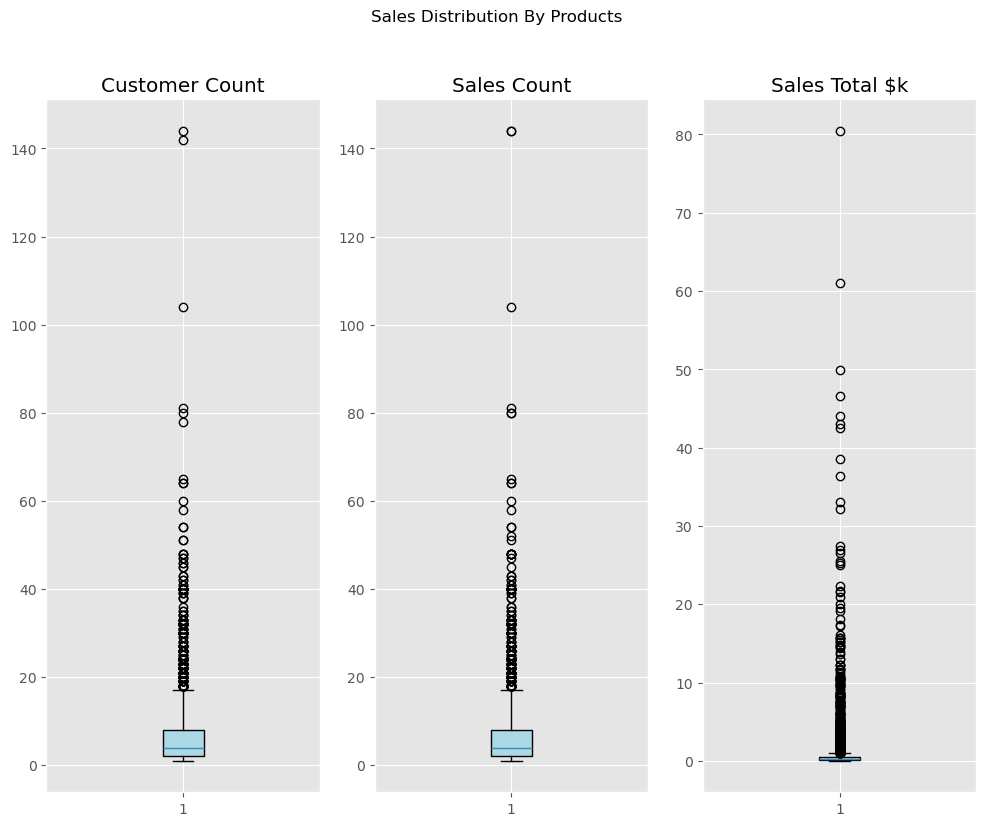

Top Five Products by Sales Value


,sku,unique_customers_count,sales_count,sales_total$k
36354,pp5006320479,20,20,80.4702
19259,pp5006381374,14,14,60.9854
35750,pp5006380003,22,22,49.9555
36007,pp5006310464,33,33,46.6250
10789,pp5006370209,14,14,43.9771


Bottom Five Products by Sales Value


,sku,unique_customers_count,sales_count,sales_total$k
6848,pp5006480614,1,1,0.0036
15587,pp5005420294,1,1,0.0048
24296,pp5004070886,1,1,0.0048
38558,pp5005670385,1,1,0.0048
13482,pp5005941705,1,1,0.0050


Total sales value $k: 4035.37, from top 100: 1635.13, approx 40.52%
Total number of products: 6110


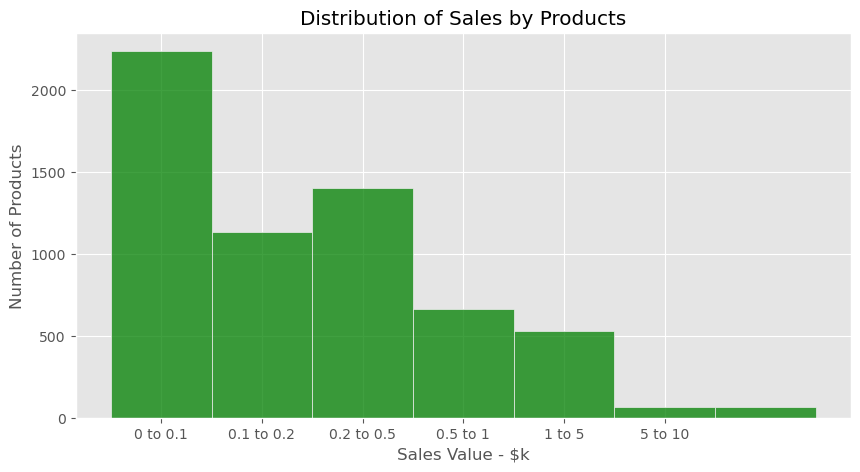

In [72]:
# Examine product sales

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Create customer sales 
cust_sales = pd.merge(customer_reviews_df, customers_df, on='customer_id')
cust_sales = pd.merge(cust_sales, sales_df, on='uniq_id')
cust_sales_stock = pd.merge(cust_sales, stock_df, on='sku', how='left')

# Exclude without a list price
no_sale_price = len(cust_sales_stock[cust_sales_stock['sale_price'] <= 0])
print(f'Sales with no sale price: {no_sale_price}')
cust_sales_stock = cust_sales_stock[cust_sales_stock['sale_price'] > 0]

# Aggregate totals for each product the sales information 
stock_summary = cust_sales_stock[['sku']].drop_duplicates()

groups = cust_sales_stock.groupby('sku')
stock_summary['sales_count'] = groups['sale_price'].transform('count')
stock_summary['sales_total$k'] = groups['sale_price'].transform('sum')
stock_summary['sales_total$k'] = (stock_summary['sales_total$k'] / 1000).round(4)
stock_summary['unique_customers_count'] = groups['customer_id'].transform('nunique')

# Box plot of the distribution for products
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize =(12, 9))
fig.suptitle('Sales Distribution By Products')

ax0.set_title('Customer Count')
ax1.set_title('Sales Count')
ax2.set_title('Sales Total $k')

box0 = ax0.boxplot(stock_summary['unique_customers_count'], patch_artist=True)
for patch in box0['boxes']:
    patch.set(facecolor='lightblue')
box1 = ax1.boxplot(stock_summary['sales_count'], patch_artist=True)
for patch in box1['boxes']:
    patch.set(facecolor='lightblue')
box2 = ax2.boxplot(stock_summary['sales_total$k'], patch_artist=True)
for patch in box2['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

# Examine top and bottom 5 products by sales value
top5 = stock_summary.nlargest(5, 'sales_total$k')
bottom5 = stock_summary.nsmallest(5, 'sales_total$k')

print('Top Five Products by Sales Value')
display(top5[['sku', 'unique_customers_count', 'sales_count', 'sales_total$k']])
print('Bottom Five Products by Sales Value')
display(bottom5[['sku', 'unique_customers_count', 'sales_count', 'sales_total$k']])

# Sales from top x
x = 100
largestX = stock_summary.nlargest(x, 'sales_total$k')
largestX_value = (largestX['sales_total$k'].sum()).round(2)
total_sales = (stock_summary['sales_total$k'].sum()).round(2)
percentage = ((largestX_value / total_sales) * 100).round(2)
total_products = len(stock_df)
print(f'Total sales value $k: {total_sales}, from top {x}: {largestX_value}, approx {percentage}%')
print(f'Total number of products: {total_products}')

# Visualise the Sales Value ranges
value_bins = [0, 0.1, 0.2, 0.5, 1, 5, 10, 500]
value_bins_labels = ['0 to 0.1', '0.1 to 0.2', '0.2 to 0.5', '0.5 to 1', '1 to 5', '5 to 10', '> 10']
stock_summary['sales_groups'] = pd.cut(stock_summary['sales_total$k'], bins=value_bins, 
                       labels=value_bins_labels, right=False)

fig, ax = plt.subplots(figsize =(10, 5))
sns.histplot(stock_summary['sales_groups'], bins=value_bins, kde=False, color = 'green')
plt.xticks([0, 1, 2, 3, 4, 5,])
plt.title('Distribution of Sales by Products')
plt.xlabel('Sales Value - $k')
plt.ylabel('Number of Products')
plt.show()

